In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST #helps in loading the datset

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(), # Converts a PIL Image or numpy.ndarray to a FloatTensor and scales the image pixels to [0.0, 1.0]
    transforms.Normalize((0.5,), (0.5,)) # Normalizes a tensor image with mean and standard deviation
])

# Load the training dataset
train_dataset = FashionMNIST(root='./data', train=True, download=True, transform=transform)
print(f"Training dataset loaded. Number of samples: {len(train_dataset)}")

# Load the test dataset
test_dataset = FashionMNIST(root='./data', train=False, download=True, transform=transform)
print(f"Test dataset loaded. Number of samples: {len(test_dataset)}")

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 192kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.48MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 19.0MB/s]

Training dataset loaded. Number of samples: 60000
Test dataset loaded. Number of samples: 10000


In [ ]:
import torch
from torch.utils.data import DataLoader, random_split

# Define batch size
batch_size = 64

# Split the training dataset into training and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("DataLoaders created for training, validation, and testing.")

Training set size: 48000
Validation set size: 12000
Test set size: 10000
DataLoaders created for training, validation, and testing.


In [ ]:
import torch.nn as nn # for deep feedforward neural network

# Define the Neural Network Architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Input layer (28*28 pixels = 784 features)
        # Hidden layer 1
        # Hidden layer 2
        # Hidden layer 3
        # Output layer (10 classes for Fashion MNIST)
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),  # Input layer to first hidden layer
            nn.ReLU(),
            nn.Linear(512, 256),     # First hidden layer to second hidden layer
            nn.ReLU(),
            nn.Linear(256, 128),     # Second hidden layer to third hidden layer
            nn.ReLU(),
            nn.Linear(128, 10)       # Third hidden layer to output layer
        )

    def forward(self, x):
        # Flatten the 2D image into a 1D vector
        x = self.flatten(x)
        # Pass through the sequential layers
        logits = self.linear_relu_stack(x)
        return logits

print("NeuralNetwork class defined successfully.")

NeuralNetwork class defined successfully.


In [ ]:
import torch.optim as optim

# 1. Instantiate the NeuralNetwork class and move to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork().to(device)
print(f"Model instantiated and moved to {device}.")

# 2. Define the loss function
loss_fn = nn.CrossEntropyLoss()
print("Loss function (CrossEntropyLoss) defined.")

# 3. Define an optimizer
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
print(f"Optimizer (Adam) defined with learning rate: {learning_rate}.")

# 4-7. Create a Python function `train_epoch`
def train_epoch(dataloader, model, loss_fn, optimizer):
    model.train() # Set the model to training mode
    total_loss = 0
    correct_predictions = 0
    num_samples = 0

    for batch, (images, labels) in enumerate(dataloader):
        # a. Move the batch of images and labels to the appropriate device
        images, labels = images.to(device), labels.to(device)

        # b. Perform a forward pass
        logits = model(images)

        # c. Calculate the loss
        loss = loss_fn(logits, labels)

        # d. Perform a backward pass
        loss.backward()

        # e. Update model parameters
        optimizer.step()

        # f. Reset gradients
        optimizer.zero_grad()

        # g. Accumulate loss and correct predictions
        total_loss += loss.item()
        _, predicted = torch.max(logits, 1) # Get the index of the max log-probability
        correct_predictions += (predicted == labels).sum().item()
        num_samples += labels.size(0)

    avg_loss = total_loss / len(dataloader)
    accuracy = correct_predictions / num_samples
    return avg_loss, accuracy

print("train_epoch function defined successfully.")

Model instantiated and moved to cpu.
Loss function (CrossEntropyLoss) defined.
Optimizer (Adam) defined with learning rate: 0.001.
train_epoch function defined successfully.


In [ ]:
def evaluate_model(dataloader, model, loss_fn):
    model.eval() # Set the model to evaluation mode
    total_loss = 0
    correct_predictions = 0
    num_samples = 0

    # Disable gradient calculations
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            logits = model(images)

            # Calculate loss
            loss = loss_fn(logits, labels)

            # Accumulate loss and correct predictions
            total_loss += loss.item()
            _, predicted = torch.max(logits, 1)
            correct_predictions += (predicted == labels).sum().item()
            num_samples += labels.size(0)

    avg_loss = total_loss / len(dataloader)
    accuracy = correct_predictions / num_samples
    return avg_loss, accuracy

print("evaluate_model function defined successfully.")

evaluate_model function defined successfully.


In [ ]:
#Train and monitor
num_epochs = 10

# Initialize lists to store metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

print("Starting training loop...")

for epoch in range(num_epochs):
    # Train for one epoch
    train_loss, train_accuracy = train_epoch(train_loader, model, loss_fn, optimizer)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Evaluate on the validation set
    val_loss, val_accuracy = evaluate_model(val_loader, model, loss_fn)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}:\n" \
          f"  Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}\n" \
          f"  Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

print("Training complete.")

Starting training loop...
Epoch 1/10:
  Train Loss: 0.5257, Train Accuracy: 0.8080
  Validation Loss: 0.4065, Validation Accuracy: 0.8521
Epoch 2/10:
  Train Loss: 0.3853, Train Accuracy: 0.8579
  Validation Loss: 0.4348, Validation Accuracy: 0.8400
Epoch 3/10:
  Train Loss: 0.3444, Train Accuracy: 0.8741
  Validation Loss: 0.3670, Validation Accuracy: 0.8612
Epoch 4/10:
  Train Loss: 0.3184, Train Accuracy: 0.8836
  Validation Loss: 0.3992, Validation Accuracy: 0.8552
Epoch 5/10:
  Train Loss: 0.2982, Train Accuracy: 0.8899
  Validation Loss: 0.3135, Validation Accuracy: 0.8867
Epoch 6/10:
  Train Loss: 0.2813, Train Accuracy: 0.8959
  Validation Loss: 0.3257, Validation Accuracy: 0.8857
Epoch 7/10:
  Train Loss: 0.2651, Train Accuracy: 0.8996
  Validation Loss: 0.3192, Validation Accuracy: 0.8866
Epoch 8/10:
  Train Loss: 0.2535, Train Accuracy: 0.9060
  Validation Loss: 0.3397, Validation Accuracy: 0.8814
Epoch 9/10:
  Train Loss: 0.2371, Train Accuracy: 0.9100
  Validation Loss: 0.

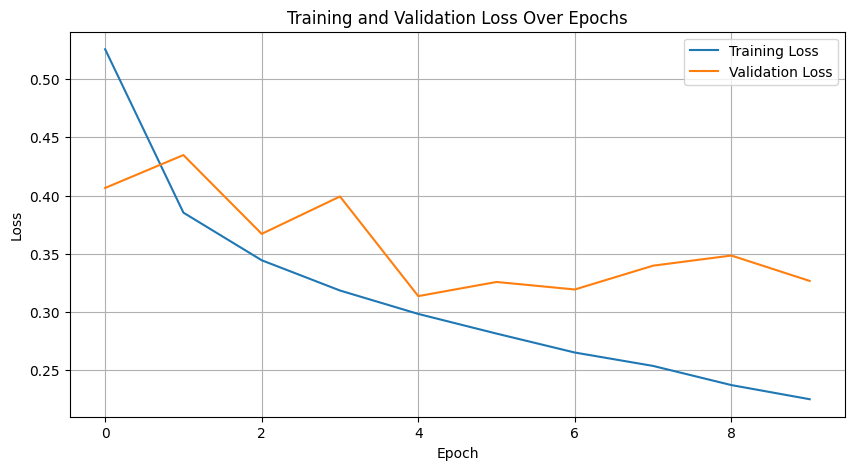

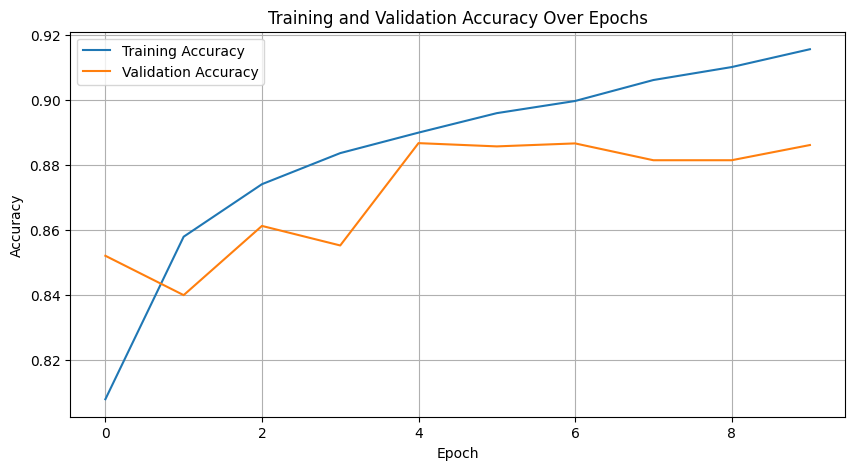

Plots generated for training and validation metrics.


In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

print("Plots generated for training and validation metrics.")

In [9]:
print("Evaluating model on test data")

test_loss, test_accuracy = evaluate_model(test_loader, model, loss_fn)

print(f"\nTest Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
print("Model evaluation on test data complete.")

Evaluating model on test data

Test Loss: 0.3652, Test Accuracy: 0.8736
Model evaluation on test data complete.


### Explanation of Core Concepts in Neural Networks

#### 1. Forward Pass
The **forward pass** is the process by which input data is fed through the neural network to produce an output prediction. It involves the following steps:
1.  **Input Layer**: The raw input data (e.g., image pixels) is fed into the network.
2.  **Weighted Sum**: Each input feature is multiplied by its corresponding weight, and these products are summed up along with a bias term for each neuron in the next layer. Mathematically, this is often represented as $Z = WX + B$, where $W$ is the weight matrix, $X$ is the input, and $B$ is the bias vector.
3.  **Activation Function**: The result of the weighted sum ($Z$) is then passed through a non-linear activation function (e.g., ReLU, sigmoid, tanh). This introduces non-linearity into the model, allowing it to learn complex patterns. For example, for ReLU, it's $A = \text{max}(0, Z)$.
4.  **Layer-by-Layer Progression**: These steps (weighted sum and activation) are repeated for each subsequent hidden layer until the data reaches the output layer.
5.  **Output Layer**: The final layer produces the network's prediction. For classification tasks like Fashion MNIST, this is often a set of logits, which can then be converted into probabilities using a softmax function.

In essence, the forward pass computes the network's output given an input and its current set of weights and biases.

#### 2. Backward Pass (Backpropagation with Chain Rule)
The **backward pass**, or **backpropagation**, is the algorithm used to calculate the gradients of the network's loss function with respect to each parameter (weights and biases). This process is crucial for training the network.
1.  **Loss Calculation**: After the forward pass, the network's output prediction is compared to the true label, and an error (or loss) is calculated using a predefined **loss function** (e.g., Cross-Entropy Loss for classification). This loss quantifies how far off the prediction was from the actual value.
2.  **Gradient Calculation**: The goal of the backward pass is to determine how much each weight and bias in the network contributed to this loss. This is done by computing the partial derivative of the loss function with respect to each parameter ($\frac{\partial L}{\partial w}$, $\frac{\partial L}{\partial b}$).
3.  **Chain Rule**: The **chain rule** from calculus is fundamental to backpropagation. It allows us to compute the gradient of the loss with respect to parameters in earlier layers by multiplying successive derivatives. For instance, if we have $y = f(g(x))$, then $\frac{dy}{dx} = \frac{dy}{dg} \cdot \frac{dg}{dx}$. In a neural network, the loss depends on the output, which depends on the activations of the previous layer, which in turn depend on the weights and biases of that layer, and so on. The chain rule effectively 'propagates' the error signal backward through the network, layer by layer, calculating the contribution of each parameter to the total error.
4.  **Gradient Accumulation**: For each layer, the gradients of the loss with respect to its weights and biases are calculated and stored. This process starts from the output layer and moves backward to the input layer.

#### 3. Gradient Updates and Influence on Model Parameters
**Gradient updates** are the mechanism by which the neural network learns from its errors and adjusts its parameters to improve performance. This typically involves an optimizer algorithm.
1.  **What a Gradient Represents**: In the context of a neural network, a **gradient** is a vector that points in the direction of the steepest ascent of the loss function. Its magnitude indicates the steepness of the slope. To minimize the loss, we want to move in the opposite direction—the direction of steepest descent. This is why we typically subtract the gradient (scaled by a learning rate) from the parameters.
2.  **Optimizer's Role**: An **optimizer** (e.g., Adam, SGD) uses the calculated gradients from the backward pass to adjust the model's weights and biases. The general update rule for a parameter (let's say a weight $w$) is:
    $w_{\text{new}} = w_{\text{old}} - \alpha \cdot \frac{\partial L}{\partial w}$
    where $\alpha$ is the **learning rate**, a hyperparameter that controls the size of the step taken in the direction of steepest descent.
3.  **Impact on Weights and Biases**:
    *   If $\frac{\partial L}{\partial w}$ is positive, increasing $w$ would increase the loss. Therefore, the optimizer decreases $w$ to reduce the loss.
    *   If $\frac{\partial L}{\partial w}$ is negative, increasing $w$ would decrease the loss. Therefore, the optimizer increases $w$ to reduce the loss.
    *   The magnitude of the gradient determines the size of the adjustment: larger gradients lead to larger updates, and smaller gradients lead to smaller updates.

By repeatedly performing forward passes to make predictions, backward passes to calculate gradients, and gradient updates to adjust parameters, the neural network iteratively learns to minimize the loss function and improve its ability to make accurate predictions.

## Impact and importance of key hyperparameters such as learning rate, batch size, and the number of epochs on the training process and model performance.


### Findings

*   The Fashion MNIST dataset was successfully loaded, transformed, and split. The final dataset configuration included 48,000 samples for training, 12,000 for validation, and 10,000 for testing, with a batch size of 64.
*   A deep feedforward neural network with an input layer, three hidden layers (512, 256, and 128 neurons respectively) using ReLU activation, and a 10-neuron output layer was defined.
*   The training process utilized Cross-Entropy Loss and an Adam optimizer with a learning rate of 0.001.
*   Over 10 epochs of training:
    *   Training loss consistently decreased from 0.5257 (Epoch 1) to 0.2249 (Epoch 10).
    *   Training accuracy steadily increased from 0.8080 (Epoch 1) to 0.9155 (Epoch 10).
    *   Validation loss generally decreased from 0.4065 (Epoch 1) to 0.3266 (Epoch 10), with some minor fluctuations, indicating stable learning.
    *   Validation accuracy improved from 0.8521 (Epoch 1) to 0.8861 (Epoch 10).
*   The final evaluation on the unseen test dataset yielded a Test Loss of 0.3652 and a Test Accuracy of 0.8736.
*   The core concepts of neural network operation, including the forward pass, backward pass (highlighting the chain rule for gradient computation), and gradient updates (explaining how optimizers adjust parameters based on gradients and learning rate), were thoroughly explained.

### Insights
*   The current model demonstrates good performance on the Fashion MNIST dataset, achieving an accuracy of 87.36% on unseen data.
*   Further hyperparameter tuning (e.g., experimenting with different learning rates, batch sizes, optimizer variations, or network architectures) could potentially yield even higher accuracy and better generalization.
